In [1]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
batch_num = 0

/Users/davidfoster/.virtualenvs/worldmodels/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [3]:
obs_data = np.load('./data/obs_data_car_racing_' + str(batch_num) + '.npy') 
action_data = np.load('./data/action_data_car_racing_' + str(batch_num) + '.npy')
reward_data = np.load('./data/reward_data_car_racing_' + str(batch_num) + '.npy') 
done_data = np.load('./data/done_data_car_racing_' + str(batch_num) + '.npy')
rnn_input = np.load('./data/rnn_input_' + str(batch_num) + '.npy') 
rnn_output = np.load('./data/rnn_output_' + str(batch_num) + '.npy')

In [4]:
rnn_input[0].shape

(299, 35)

In [5]:
rnn_output[0].shape

(299, 34)

[-5.67852376e-01  5.11378162e-01  5.91822352e-01 -8.37370806e-01
 -1.25358914e-01  7.58705105e-01 -6.37707056e-01  1.37142070e+00
 -2.57643138e+00  1.54584229e+00 -1.04261337e+00  7.64055548e-01
  1.27509541e+00 -7.62761422e-01 -4.59945608e-01  8.26795378e-01
 -8.60223973e-01 -5.90274616e-01  2.86860821e+00 -1.85193266e+00
 -1.91829355e-04 -2.34797795e-01 -2.17933063e-01  1.09487168e+00
 -6.24955297e-01 -3.31451373e-01  5.06588373e-01  2.31793518e-03
 -1.00528106e-01  2.88291571e-01  2.22257716e+00  9.22314950e-01
  0.00000000e+00  3.72278164e-01  0.00000000e+00]


<function matplotlib.pyplot.show>

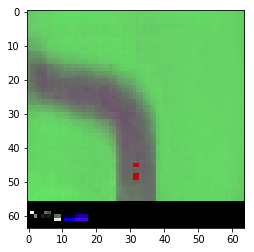

In [7]:
idx = 75
obs = rnn_input[0][idx]
print(obs)
z_decoded = vae.decoder.predict(np.array([obs[:32]]))[0]
plt.imshow(z_decoded)
plt.show